# This Notebook contains the code to perform Exploratory Data Analysis & create a new Store Level dataset having weekly sales at a store level

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score,auc,confusion_matrix,classification_report,precision_score,roc_curve,roc_auc_score,recall_score,f1_score,precision_score
from sklearn import metrics
import missingno as mn
import math as m
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_palette('husl',8)

C:\Users\bhavi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Reading the cleaned & merged dataset
*Creating a Week Number column to replace the date column*

In [2]:
sales_forecasting_df = pd.read_csv("data/sales_forecasting.csv")
sales_forecasting_df['Date'] = pd.to_datetime(sales_forecasting_df.Date)
sales_forecasting_df['week_nbr'] = sales_forecasting_df.sort_values(['Date'],ascending=[True]).groupby(['Store', 'Dept'])\
             .cumcount() + 1
print(sales_forecasting_df.head())
print(sales_forecasting_df.shape)

   Store  Dept       Date  Weekly_Sales    Size  Type_A  Type_B  Type_C  \
0      1     1 2010-02-05      24924.50  151315       1       0       0   
1      1     1 2010-02-12      46039.49  151315       1       0       0   
2      1     1 2010-02-19      41595.55  151315       1       0       0   
3      1     1 2010-02-26      19403.54  151315       1       0       0   
4      1     1 2010-03-05      21827.90  151315       1       0       0   

   Temperature  Fuel_Price         CPI  Unemployment  IsHoliday  week_nbr  
0        42.31       2.572  211.096358         8.106          0         1  
1        38.51       2.548  211.242170         8.106          1         2  
2        39.93       2.514  211.289143         8.106          0         3  
3        46.63       2.561  211.319643         8.106          0         4  
4        46.50       2.625  211.350143         8.106          0         5  
(421570, 14)


In [3]:
sales_forecasting_df = sales_forecasting_df.drop(columns=['Date'])
sales_forecasting_df.head()

,Store,Dept,Weekly_Sales,Size,Type_A,Type_B,Type_C,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,week_nbr
0,1,1,24924.50,151315,1,0,0,42.31,2.572,211.096358,8.106,0,1
1,1,1,46039.49,151315,1,0,0,38.51,2.548,211.242170,8.106,1,2
2,1,1,41595.55,151315,1,0,0,39.93,2.514,211.289143,8.106,0,3
3,1,1,19403.54,151315,1,0,0,46.63,2.561,211.319643,8.106,0,4
4,1,1,21827.90,151315,1,0,0,46.50,2.625,211.350143,8.106,0,5


### 1. Viewing the average sales across the 3 store types

In [4]:
store_type = ['A','B','C']
average_sales = [sales_forecasting_df.loc[sales_forecasting_df['Type_A'] == 1, 'Weekly_Sales'].sum()/sales_forecasting_df.Type_A.sum(),
                 sales_forecasting_df.loc[sales_forecasting_df['Type_B'] == 1, 'Weekly_Sales'].sum()/sales_forecasting_df.Type_B.sum(),
                 sales_forecasting_df.loc[sales_forecasting_df['Type_C'] == 1, 'Weekly_Sales'].sum()/sales_forecasting_df.Type_C.sum()]

*Stores of Type A, have a much higher average sales than types B & C*
##### *Hence, Store Size would also have an impact on Sales, as the store types A, B & C represent the 3 categories of store sizes*

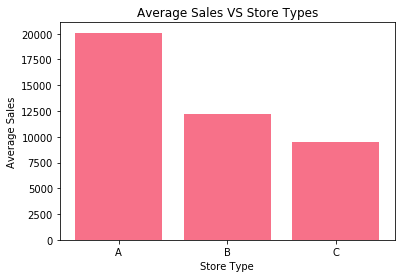

In [5]:
plt.bar(store_type, average_sales, align='center')
plt.title('Average Sales VS Store Types')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.show()

### 2. Viewing the average sales across Holiday week & Non Holiday week categories

In [6]:
Holiday_week = ['Yes','No']
average_sales = [sales_forecasting_df.loc[sales_forecasting_df['IsHoliday'] == 1, 'Weekly_Sales'].sum()/sales_forecasting_df.IsHoliday.sum(),
                 sales_forecasting_df.loc[sales_forecasting_df['IsHoliday'] == 0, 'Weekly_Sales'].sum()/(len(sales_forecasting_df)-sales_forecasting_df.IsHoliday.sum())]

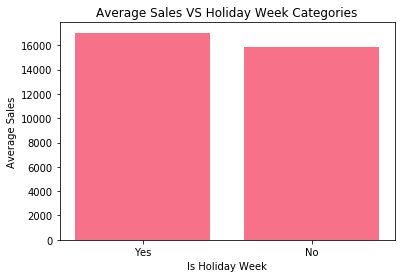

In [7]:
plt.bar(Holiday_week, average_sales, align='center')
plt.title('Average Sales VS Holiday Week Categories')
plt.xlabel('Is Holiday Week')
plt.ylabel('Average Sales')
plt.show()

### 3. Total Weekly Sales at a Store level

We can observe a fluctuating seasonal trend across all the 45 stores. As expected, we see a huge peak in sales during the months of November & December every year

In [8]:
sales_week_store_lvl = sales_forecasting_df.groupby(['Store', 'week_nbr'],as_index=False).agg({'Weekly_Sales': ['sum']})
sales_week_store_lvl.columns = ["_".join(x) for x in sales_week_store_lvl.columns.ravel()]

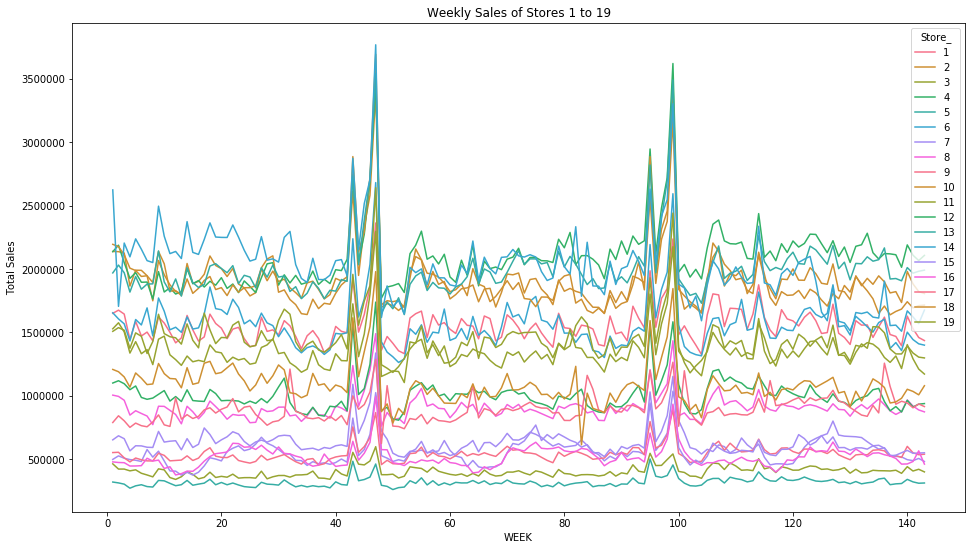

In [9]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]
sales_week_store_lvl[(sales_week_store_lvl.Store_ >= 1) & (sales_week_store_lvl.Store_ <20)].pivot(index="week_nbr_", columns="Store_", values="Weekly_Sales_sum").plot()
plt.xlabel('WEEK')
plt.ylabel('Total Sales')
plt.title('Weekly Sales of Stores 1 to 19')
plt.show()

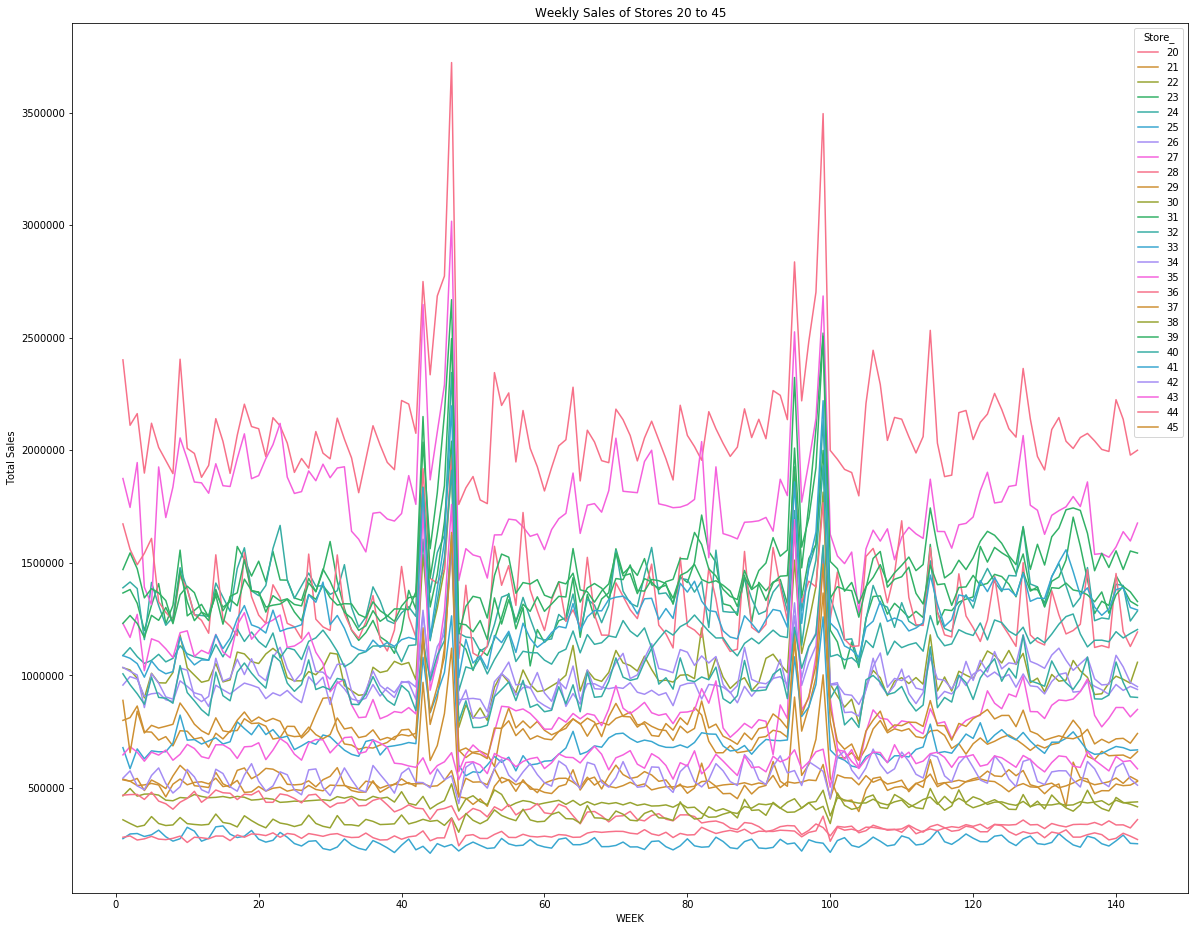

In [10]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20,16]
sales_week_store_lvl[(sales_week_store_lvl.Store_ >= 20)].pivot(index="week_nbr_", columns="Store_", values="Weekly_Sales_sum").plot()
plt.xlabel('WEEK')
plt.ylabel('Total Sales')
plt.title('Weekly Sales of Stores 20 to 45')
plt.show()

In [12]:
sales_week_store_lvl = sales_week_store_lvl.sort_values(['Store_', 'week_nbr_'], ascending=[True, True])
sales_week_store_lvl

,Store_,week_nbr_,Weekly_Sales_sum
0,1,1,1650399.00
1,1,2,1675305.37
2,1,3,1644421.11
3,1,4,1442911.49
4,1,5,1586448.75
...,...,...,...
6430,45,139,700554.73
6431,45,140,718326.40
6432,45,141,720495.96
6433,45,142,698900.38


*Joining back the rolled up table with features table to pull the explanatory attributes*

In [25]:
features_df = pd.read_csv("data/treated_features.csv")
features_df['Date'] = pd.to_datetime(features_df.Date)
features_df['week_nbr'] = features_df.sort_values(['Date'],ascending=[True]).groupby(['Store'])\
             .cumcount() + 1
week_store_sales_attri = pd.merge(sales_week_store_lvl,features_df, how = 'inner', left_on=['Store_','week_nbr_'], right_on = ['Store','week_nbr'])

In [27]:
week_store_sales_attri = week_store_sales_attri.drop(columns=['Store_','week_nbr_',])
week_store_sales_attri

,Weekly_Sales_sum,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,week_nbr
0,1650399.00,1,2010-02-05,42.31,2.572,211.096358,8.106,False,1
1,1675305.37,1,2010-02-12,38.51,2.548,211.242170,8.106,True,2
2,1644421.11,1,2010-02-19,39.93,2.514,211.289143,8.106,False,3
3,1442911.49,1,2010-02-26,46.63,2.561,211.319643,8.106,False,4
4,1586448.75,1,2010-03-05,46.50,2.625,211.350143,8.106,False,5
...,...,...,...,...,...,...,...,...,...
6430,700554.73,45,2012-09-28,64.88,3.997,192.013558,8.684,False,139
6431,718326.40,45,2012-10-05,64.89,3.985,192.170412,8.667,False,140
6432,720495.96,45,2012-10-12,54.47,4.000,192.327265,8.667,False,141
6433,698900.38,45,2012-10-19,56.47,3.969,192.330854,8.667,False,142


#### Correlation Matrix between Target Variable (Sales) and other explanatory Numeric Variable
*Fuel Price is least Correlated with Sales (Almost uncorrelated). Unemployment, Temperature & CPI are negatively correlated with Sales*

In [28]:
corrMatrix = week_store_sales_attri[['Weekly_Sales_sum','Temperature','Fuel_Price','CPI','Unemployment']].corr()
corrMatrix

,Weekly_Sales_sum,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales_sum,1.000000,-0.054731,0.008130,-0.073281,-0.106828
Temperature,-0.054731,1.000000,0.144967,0.176943,0.086793
Fuel_Price,0.008130,0.144967,1.000000,-0.170642,-0.056933
CPI,-0.073281,0.176943,-0.170642,1.000000,-0.275391
Unemployment,-0.106828,0.086793,-0.056933,-0.275391,1.000000


### Pulling in Store Size & Store Type to create final Dataframe with Store level Sales

In [29]:
stores_df = pd.read_csv("data/stores.csv")
stores_df = pd.concat([stores_df,pd.get_dummies(stores_df.Type, prefix='Type')],axis=1)
stores_df.drop(['Type'],axis=1, inplace=True)
stores_df.head()

,Store,Size,Type_A,Type_B,Type_C
0,1,151315,1,0,0
1,2,202307,1,0,0
2,3,37392,0,1,0
3,4,205863,1,0,0
4,5,34875,0,1,0


In [31]:
week_store_sales_attri

,Weekly_Sales_sum,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,week_nbr
0,1650399.00,1,2010-02-05,42.31,2.572,211.096358,8.106,False,1
1,1675305.37,1,2010-02-12,38.51,2.548,211.242170,8.106,True,2
2,1644421.11,1,2010-02-19,39.93,2.514,211.289143,8.106,False,3
3,1442911.49,1,2010-02-26,46.63,2.561,211.319643,8.106,False,4
4,1586448.75,1,2010-03-05,46.50,2.625,211.350143,8.106,False,5
...,...,...,...,...,...,...,...,...,...
6430,700554.73,45,2012-09-28,64.88,3.997,192.013558,8.684,False,139
6431,718326.40,45,2012-10-05,64.89,3.985,192.170412,8.667,False,140
6432,720495.96,45,2012-10-12,54.47,4.000,192.327265,8.667,False,141
6433,698900.38,45,2012-10-19,56.47,3.969,192.330854,8.667,False,142


In [32]:
sales_forecasting_store_lvl_df = pd.merge(week_store_sales_attri, stores_df,  how='inner', left_on=['Store'], right_on = ['Store'])
sales_forecasting_store_lvl_df = sales_forecasting_store_lvl_df.sort_values(['Store', 'week_nbr'], ascending=[True, True])
sales_forecasting_store_lvl_df.head(10)

,Weekly_Sales_sum,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,week_nbr,Size,Type_A,Type_B,Type_C
0,1650399.00,1,2010-02-05,42.31,2.572,211.096358,8.106,False,1,151315,1,0,0
1,1675305.37,1,2010-02-12,38.51,2.548,211.242170,8.106,True,2,151315,1,0,0
2,1644421.11,1,2010-02-19,39.93,2.514,211.289143,8.106,False,3,151315,1,0,0
3,1442911.49,1,2010-02-26,46.63,2.561,211.319643,8.106,False,4,151315,1,0,0
4,1586448.75,1,2010-03-05,46.50,2.625,211.350143,8.106,False,5,151315,1,0,0
5,1471583.26,1,2010-03-12,57.79,2.667,211.380643,8.106,False,6,151315,1,0,0
6,1502353.56,1,2010-03-19,54.58,2.720,211.215635,8.106,False,7,151315,1,0,0
7,1433157.16,1,2010-03-26,51.45,2.732,211.018042,8.106,False,8,151315,1,0,0
8,1621507.96,1,2010-04-02,62.27,2.719,210.820450,7.808,False,9,151315,1,0,0
9,1573567.26,1,2010-04-09,65.86,2.770,210.622857,7.808,False,10,151315,1,0,0


In [34]:
sales_forecasting_store_lvl_df

,Weekly_Sales_sum,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,week_nbr,Size,Type_A,Type_B,Type_C
0,1650399.00,1,2010-02-05,42.31,2.572,211.096358,8.106,False,1,151315,1,0,0
1,1675305.37,1,2010-02-12,38.51,2.548,211.242170,8.106,True,2,151315,1,0,0
2,1644421.11,1,2010-02-19,39.93,2.514,211.289143,8.106,False,3,151315,1,0,0
3,1442911.49,1,2010-02-26,46.63,2.561,211.319643,8.106,False,4,151315,1,0,0
4,1586448.75,1,2010-03-05,46.50,2.625,211.350143,8.106,False,5,151315,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,700554.73,45,2012-09-28,64.88,3.997,192.013558,8.684,False,139,118221,0,1,0
6431,718326.40,45,2012-10-05,64.89,3.985,192.170412,8.667,False,140,118221,0,1,0
6432,720495.96,45,2012-10-12,54.47,4.000,192.327265,8.667,False,141,118221,0,1,0
6433,698900.38,45,2012-10-19,56.47,3.969,192.330854,8.667,False,142,118221,0,1,0


#### *Writing the final store level data to CSV*

In [33]:
sales_forecasting_store_lvl_df.to_csv('data/sales_forecasting_store_level.csv', index=False)